# Subordinator for CTRWs

Followed the steps from the paper:

[[1] Continuous Time Random Walks (CTRWs): Simulation of continuous trajectories](https://arxiv.org/abs/0707.3221)

**Table of contents** 
1. Brief introduction
2. Numerical simulations of sample path (Euler scheme)
3. Generation of random variables with skewed $\alpha$-stable PDF acording to equation $(5)$
4. Single stability indicy, $\alpha$
5. Different stability indicies, $\alpha_i$

# 1. Brief intro

# 2. Numerical simulations of sample path

Function

\begin{equation}\label{eq:1}
x (s + \Delta s) = x(s) + \Delta s F(x(s)) + \eta(s, \Delta s)
\end{equation}

\begin{equation}\label{eq:2}
t (s + \Delta s) = t(s) + \tau_{\alpha} (s, \Delta s)
\end{equation}



In [1]:
# Python imports 
import numpy as np
import matplotlib.pyplot as plt


def subordinator(alpha, N, s_delta, t_delta):
    """
    Subordinator 
    
    :param alpha: stability indicy
    :param N: number of steps 
    :param s_delta: change in s
    :param t_delta: change in t
    
    :return: Euler scheme for x(s) and t(s)
    """
    x_euler = np.zeros(100000000)
    t_euler = np.zeros(100000000)
    
    x_euler_2 = np.zeros(N)
    t_euler_2 = np.zeros(N)

    x_euler[0] = 1
    t_euler[0] = 0  # U(0)

    s = 0
    t = 0
    
    c1 = np.pi / 2
    
    
    for j in range(1, N-1):
        t_j = j * t_delta
        
        while t_euler[s] < t_j:
            ###################################################################### Calculate random tau (noise)
            
            W = np.random.exponential(1)
            V = np.random.uniform(-np.pi / 2, +np.pi / 2)


            tau_delta_s = s_delta ** (1 / alpha) * (np.sin(alpha * (V + c1)) / (np.cos(V) ** (1 / alpha))) * (
                    ((np.cos(V - alpha * (V + c1))) / W) ** ((1 - alpha) / alpha))

            ###################################################################### t(s)
            
            t_euler[s + 1] = t_euler[s] + tau_delta_s


            ###################################################################### x(t)

            F = -x_euler[s]
            x_euler[s + 1] = x_euler[s] + s_delta * F + np.random.normal(scale=s_delta ** (1 / 2))

            s = s + 1
            
        
        # print("Broke loop;", s)

        x_euler_2[t] = x_euler[s]
        t_euler_2[t] = t_euler[s-1] # save the time before, not s
        t = t + 1

    return x_euler_2, t_euler_2

Run simulation for parametrs: 

## 3. Single stability indicy, $\alpha$

In [2]:
# Set parameters for process
al = 0.8     # stability indicy
N = 1000     # number of steps 
T = 10       # total time 
dt = T / N   # size of change in t, dt
st = 0.0001  # size of change in s, ds; has to be smaller than dt

print(dt > st)
print(f'dt={dt}')
print(f'st={st}')

# Calculate the process
x_euler, t_euler = subordinator(alpha=al,
                                N=N,
                                s_delta=st,
                                t_delta=dt)

True
dt=0.01
st=0.0001


Plot combined plot:

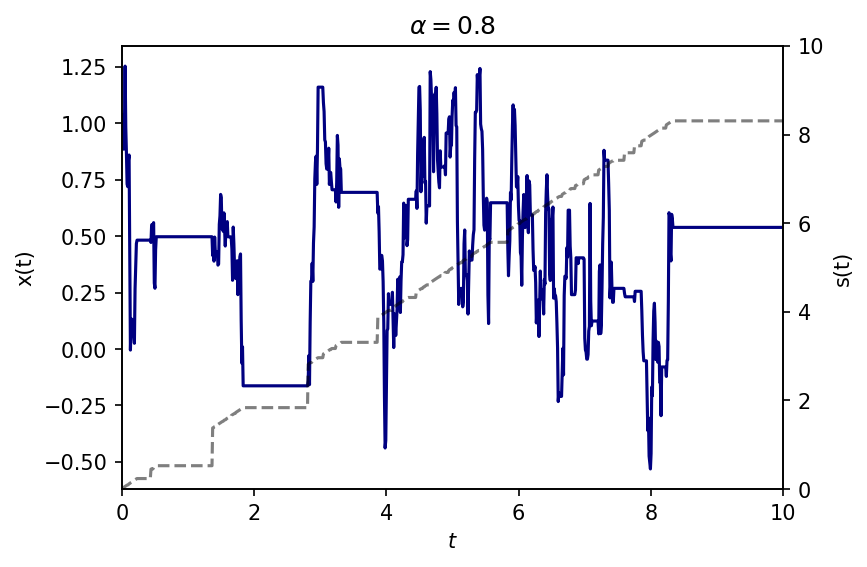

In [3]:
fig, ax1 = plt.subplots(dpi=150)

ax2 = ax1.twinx() # make a duplicate axis on the right for the s(t)

time = np.linspace(0, T, N-2)

# x(t)
ax1.plot(time, x_euler[0:N-2], "navy")
ax1.set_ylabel("x(t)")
ax1.set_xlabel(r"$t$")
ax1.set_xlim(0, T)

# s(t)
ax2.plot(time, t_euler[0:N-2], "k--", alpha=0.5)
ax2.set_ylabel("s(t)")
ax2.set_ylim(0, T)


plt.title(r"$\alpha=$" + f'{al}')
plt.tight_layout(pad=1.5)
# Uncomment if you wish to save the plot
# plt.savefig(f"plots/{alpha}.png")
plt.show()

## 4. Different stability indicies $\alpha_i$

Sample trajectories of CTRWs with linear repelling force $F(x) = −x$ for different stability indices α. The solid blue line
corresponds to the process $x(t)$ whereas the dashed line indicates the corresponding $s(t)$. $\alpha = 1$ complies with the **standard Ornstein-Uhlenbeck process**. With decreasing $\alpha$ the process is dominated by waiting events indicated by constant $x$ and $s$.

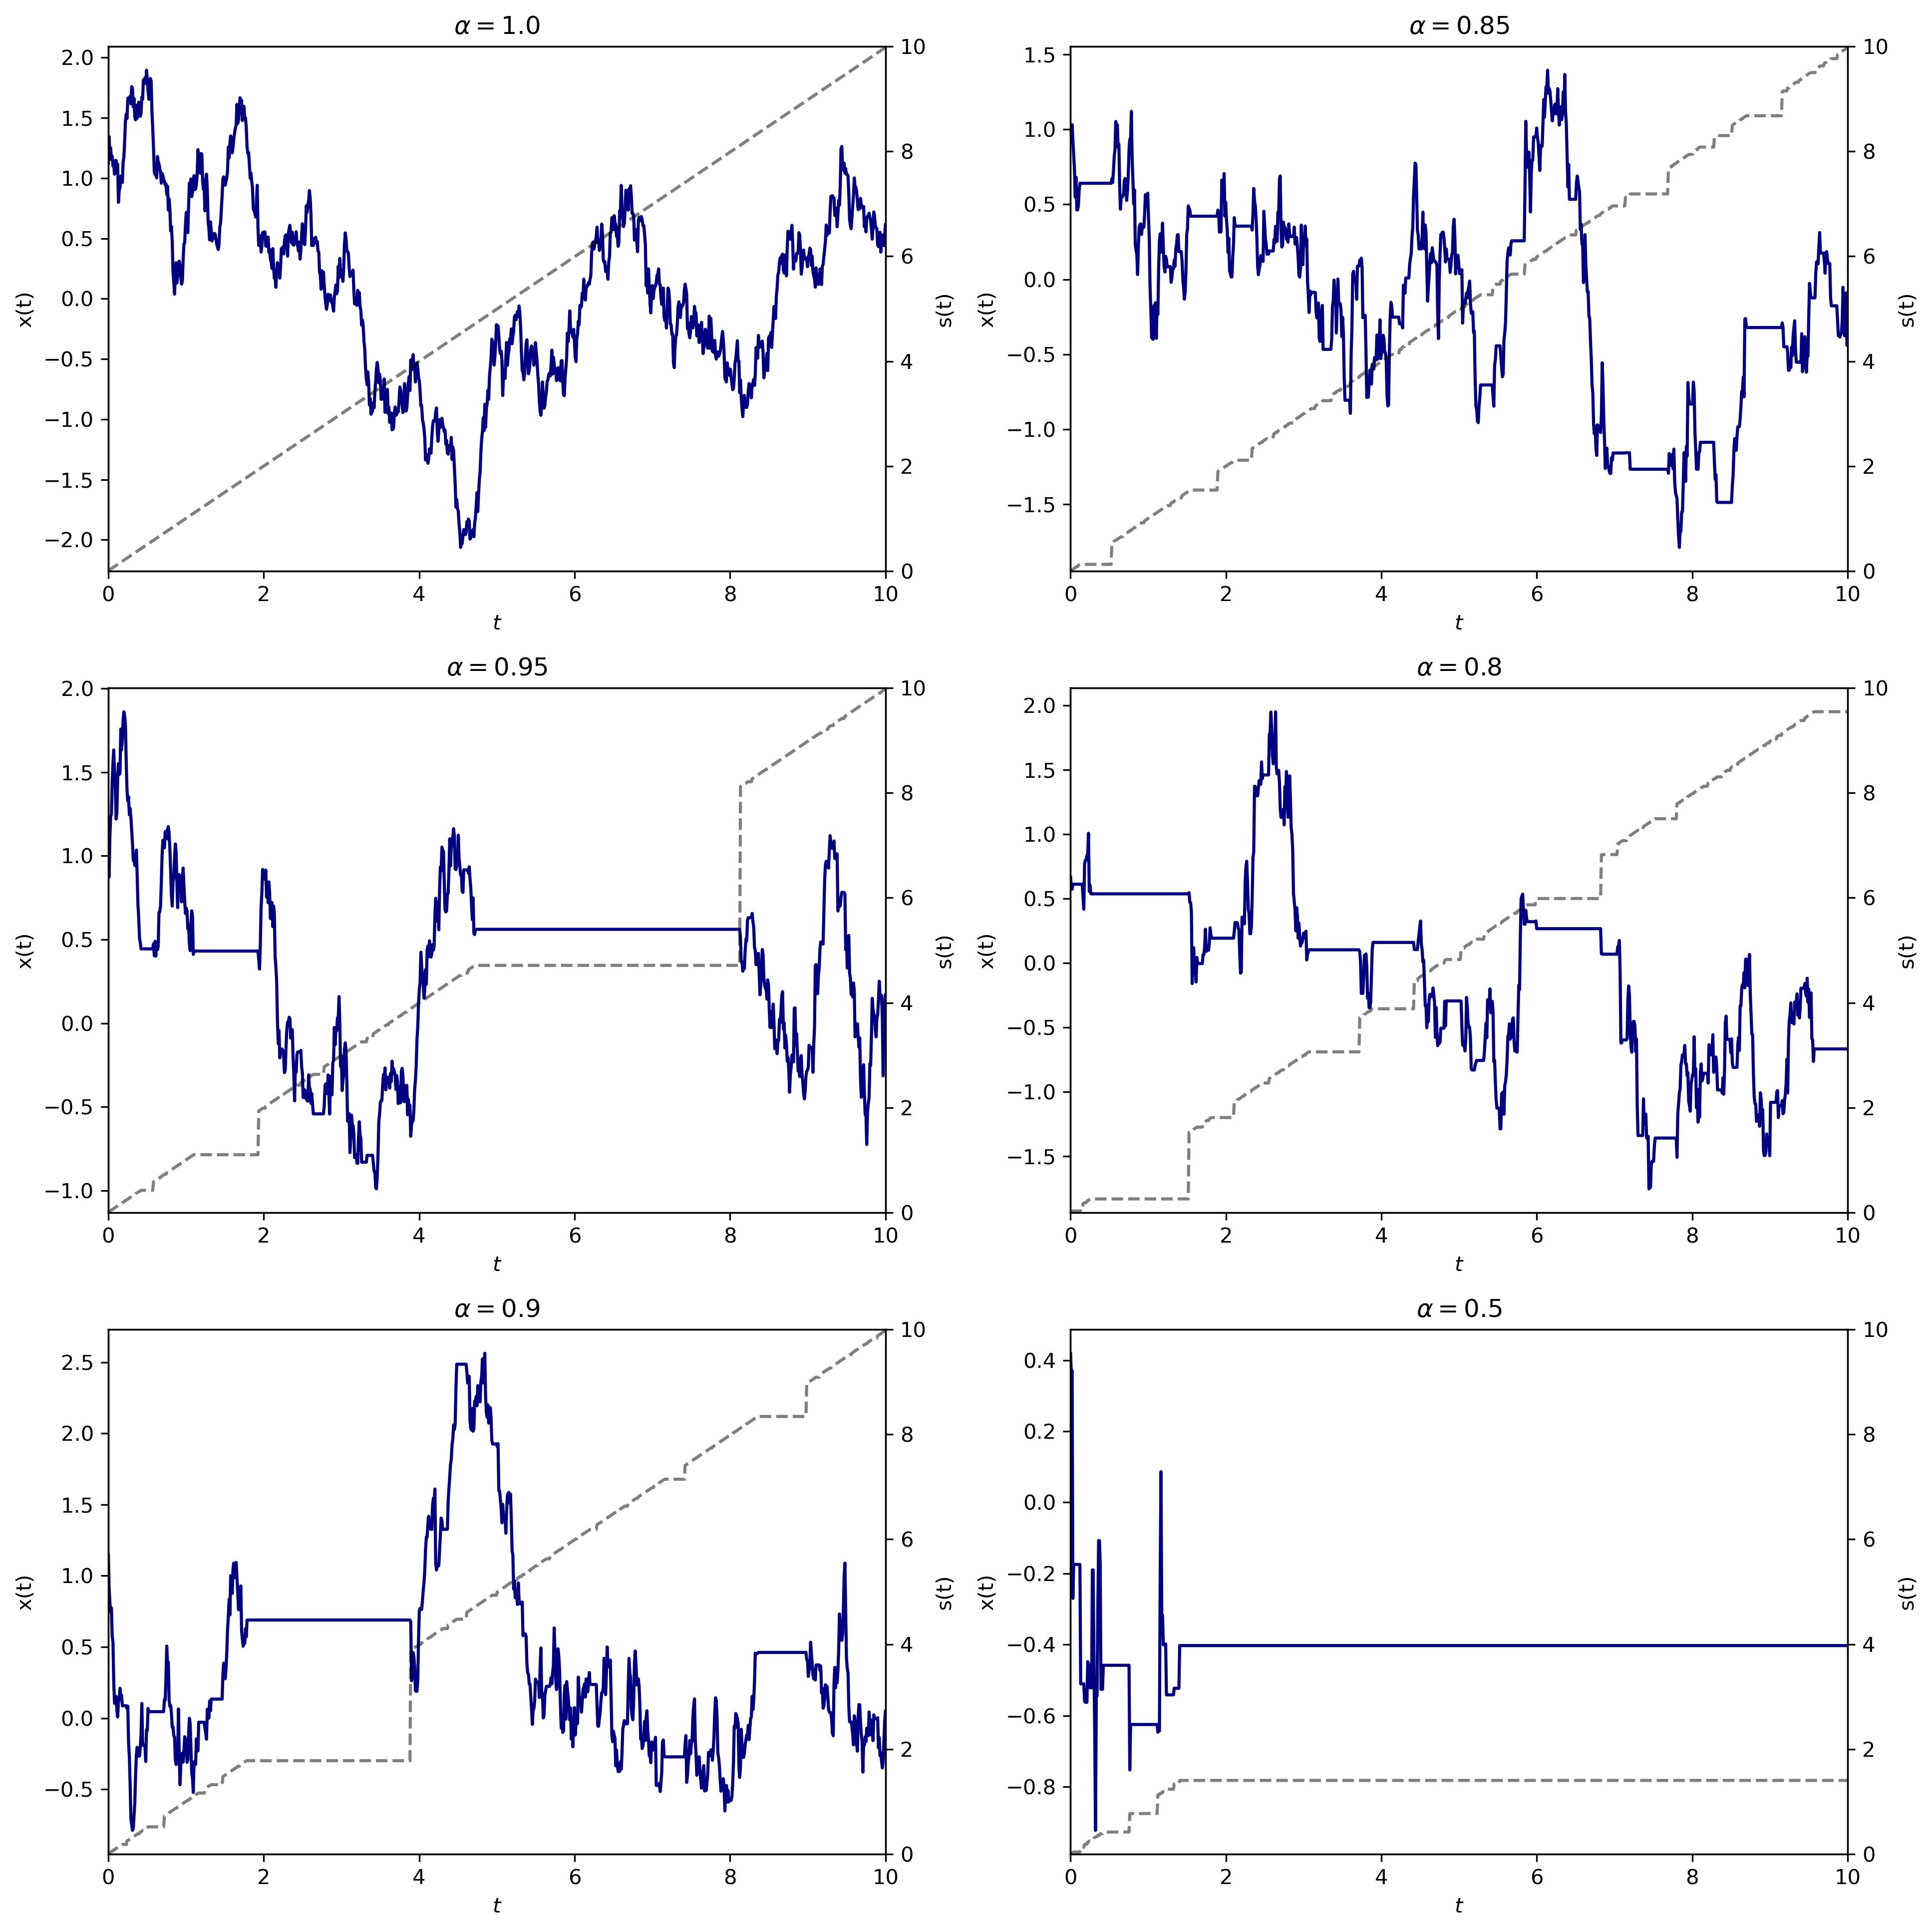

In [6]:
#####################################################
##################  CALCULATIONS   ##################
#####################################################

# Define the different alpha values, alpha_i
alphas = [1.0, 0.85, 0.95, 0.80, 0.9, 0.5]

# Quick way: create 2 lists for storing the x(t) and t(s) for all the different alpha values
x_e = []
t_e = []

# Iterate through all alphas, calculate x and t 
for al in alphas:
    
    # Basic parameters 
    N = 1000
    T = 10
    dt = T / N
    st = 0.0001
    
    # Calculation of both differential eq.
    x_euler, t_euler = subordinator(alpha=al,
                                       N=N,
                                       s_delta=st,
                                       t_delta=dt)
    
    # Save values
    x_e.append(x_euler)
    t_e.append(t_euler)

    
#####################################################
####################  PLOTTING   ####################
#####################################################

fig, ax = plt.subplots(3, 2, figsize=(13,13), dpi=300)
plt.rcParams['savefig.facecolor'] = "0.9"

# subplots, access to desired axis using formula: i*2 + j
for i in range(0, 3):
    for j in range(0, 2):
        
        ax[i, j].set_title(r"$\alpha=$" + f'{alphas[i*2+j]}')
        x_euler = x_e[i*2+j]
        t_euler = t_e[i*2+j]
        
        ax2 = ax[i, j].twinx()

        time = np.linspace(0, T, N-2)

        ax[i, j].plot(time, x_euler[0:N-2], "navy")
        ax[i, j].set_ylabel("x(t)")

        ax2.plot(time, t_euler[0:N-2], "k--", alpha=0.5)
        ax2.set_ylabel("s(t)")
        ax2.set_ylim(0, T)


        ax[i, j].set_xlabel(r"$t$")
        ax[i, j].set_xlim(0, T)
        
plt.tight_layout()
# Uncomment the line bellow if you wish to save the fig
# plt.savefig("subordinator-standard-ou-different-alpha.png")
plt.show()